In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pkg_resources
import pip
installedPackages = {pkg.key for pkg in pkg_resources.working_set}
required = { 'pandas','numpy', 'matplotlib', 'seaborn','toad','pickle','sklearn'}
missing = required - installedPackages
if missing:
    !pip install pandas
    !pip install numpy
    !pip install matplotlib
    !pip install seaborn
    !pip install toad
    !pip install pickle
    !pip install sklearn

C:\Users\Viji\Anaconda3\lib\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [136]:
#import Libraries
from sklearn.metrics import roc_auc_score,roc_curve,auc,precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics 
import pandas as pd
import numpy as np
import glob
import math
import seaborn as sns 
import matplotlib.pyplot as plt
import toad
import pickle
import time

## Data Preprocessing:

In [3]:
# Load the Date into the dataframe

df=pd.read_csv('C://Users//Viji//OneDrive - UWE Bristol//Desktop//Balan_Dissertation//Final//Data Sets-sample//Data//UCI_Credit_Card.csv')

In [4]:
# check the size of the data
df.shape

(30000, 25)

In [5]:
## check few lines
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [6]:
#check the column details
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [7]:
#check is there any missing values or not:
df.isnull().sum() 

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [8]:
#chefck unique values in each column
for index, each in enumerate(df.columns):
  print (index,  "---" ,df[each].unique())

0 --- [    1     2     3 ... 29998 29999 30000]
1 --- [  20000.  120000.   90000.   50000.  500000.  100000.  140000.  200000.
  260000.  630000.   70000.  250000.  320000.  360000.  180000.  130000.
  450000.   60000.  230000.  160000.  280000.   10000.   40000.  210000.
  150000.  380000.  310000.  400000.   80000.  290000.  340000.  300000.
   30000.  240000.  470000.  480000.  350000.  330000.  110000.  420000.
  170000.  370000.  270000.  220000.  190000.  510000.  460000.  440000.
  410000.  490000.  390000.  580000.  600000.  620000.  610000.  700000.
  670000.  680000.  430000.  550000.  540000. 1000000.  530000.  710000.
  560000.  520000.  750000.  640000.   16000.  570000.  590000.  660000.
  720000.  327680.  740000.  800000.  760000.  690000.  650000.  780000.
  730000.]
2 --- [2 1]
3 --- [2 1 3 5 4 6 0]
4 --- [1 2 3 0]
5 --- [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72

In [9]:
#Education:

#in education the data description we have only option "Education (1 = graduate school; 2 = university; 3 = high school; 
#4 = others)", but 5 & 6 we dont the option description, so merge 5 & 6 option with 4 others option.
#df.replace({'EDUCATION': r'^5.$'}, {'EDUCATION': '4'}, regex=True)
replace = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[replace, 'EDUCATION'] = 4
df['EDUCATION'].unique()

array([2, 1, 3, 4], dtype=int64)

In [10]:
#Marriage:
# Marriage has the unknown option "0", which we can merge it with "3"
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

In [11]:
# History of past payment columns from "PAY_0	PAY_2	PAY_3	PAY_4	PAY_5	PAY_6", it has the minius value which is lesser
# than "0", so there is no point of keeping it, so i replace the minus values into 0.

replace = (df.PAY_0 == -2) | (df.PAY_0 == -1) 
df.loc[replace, 'PAY_0'] = 0
replace = (df.PAY_2 == -2) | (df.PAY_2 == -1) 
df.loc[replace, 'PAY_2'] = 0
replace = (df.PAY_3 == -2) | (df.PAY_3 == -1) 
df.loc[replace, 'PAY_3'] = 0
replace = (df.PAY_4 == -2) | (df.PAY_4 == -1) 
df.loc[replace, 'PAY_4'] = 0
replace = (df.PAY_5 == -2) | (df.PAY_5 == -1) 
df.loc[replace, 'PAY_5'] = 0
replace = (df.PAY_6 == -2) | (df.PAY_6 == -1)
df.loc[replace, 'PAY_6'] = 0
#checking the above values:
df['PAY_6'].unique()

array([0, 2, 3, 6, 4, 7, 8, 5], dtype=int64)

In [12]:
# #Grouping the age
# df['Agegroup'] = 0 #creates a column of 0
# df.loc[((df['AGE'] > 20) & (df['AGE'] < 30)) , 'Agegroup'] = 1
# df.loc[((df['AGE'] >= 30) & (df['AGE'] < 40)) , 'Agegroup'] = 2
# df.loc[((df['AGE'] >= 40) & (df['AGE'] < 50)) , 'Agegroup'] = 3
# df.loc[((df['AGE'] >= 50) & (df['AGE'] < 60)) , 'Agegroup'] = 4
# df.loc[((df['AGE'] >= 60) & (df['AGE'] < 70)) , 'Agegroup'] = 5
# df.loc[((df['AGE'] >= 70) & (df['AGE'] < 81)) , 'Agegroup'] = 6

In [13]:
# del df["AGE"]

In [14]:
#Check the dataframe:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.842267,1.557267,35.485500,0.356767,0.320033,0.304067,0.258767,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.744494,0.521405,9.217904,0.760594,0.801727,0.790589,0.761113,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [15]:
# x.describe

In [16]:
# check the target variable by spliting the fraud and non_fraud customer:

def target_info(df_target_column):
    '''
    Print target column information -- count for each unique values in target column
    Input: target column in dataframe
    '''
    proportion_true=str(round(sum(df_target_column == True) / len(df_target_column), 2) * 100)
    
    proportion_false=str(round(sum(df_target_column == False) / len(df_target_column), 3) * 100)
    
    print('There are total {} records in our data.'.format(len(df_target_column)))
    print('Is Fraud:')
    print('Count: {}'.format(sum(df_target_column == True)))
    print('Proportion (Fraud): {}'.format(proportion_true
                                  + '%'))
    print('Not Fraud:')
    print('Count: {}'.format(sum(df_target_column == False)))
    print('Proportion (Not Fraud): {}'.format(proportion_false
                                  + '%'))
    plt.figure(figsize=(5, 5))
    sns.barplot(x=df_target_column.value_counts().index, y=df_target_column.value_counts())
    plt.title('Not Fraud vs Fraud Counts')
    plt.ylabel('Count')
    return proportion_true

###one method of spliting:

In [17]:
#split the train and test data
def data_split(df, start, end, date_col):
    """
    split the dataset into training or testing using date
    :param data: (df) pandas dataframe, start, end
    :return: (df) pandas dataframe
    """
    df = df[(df[date_col] >= start) & (df[date_col] < end)]
    #data = df[(df.order_date >= start) & (df.order_date < end)]
    df = df.reset_index(drop=True)
    #data = data.sort_values(["date", "tic"], ignore_index=True)
    #data.index = data.date.factorize()[0]
    return df

In [18]:
# use the ID column to split the train-test data
# x_train = data_split(df,start = 0, end=22500,date_col='ID')
# x_test = data_split(df,start = 22500, end=172792,date_col='ID')

In [19]:
# df.describe
df['label']=df['default.payment.next.month']
df=df.drop(columns=['default.payment.next.month'])

In [1]:
# use the ID column to split the train-test data
train = data_split(df,start = 0, end=22500,date_col='ID')
test = data_split(df,start = 22500, end=172792,date_col='ID')

NameError: name 'data_split' is not defined

There are total 30000 records in our data.
Is Fraud:
Count: 6636
Proportion (Fraud): 22.0%
Not Fraud:
Count: 23364
Proportion (Not Fraud): 77.9%


'22.0'

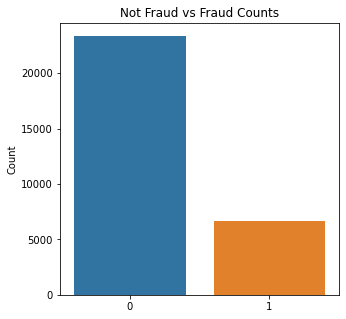

In [21]:
#check the fraud proportion of the Target column
# y=df['default.payment.next.month']
# x=df.drop(['default.payment.next.month'],axis=1)
target_info(df['label'])

In [22]:
train.label.value_counts()

0    17411
1     5088
Name: label, dtype: int64

In [23]:
test.label.value_counts()

0    5953
1    1548
Name: label, dtype: int64

In [24]:
#use the world 'target' and seperate the target variable from the df
# df['label']=df['default.payment.next.month']
# df=df.drop(columns=['default.payment.next.month'])
# y=df['default.payment.next.month']
# x=df.drop(['default.payment.next.month'],axis=1)

### second method of spliting:

In [25]:

y=df['label']
x=df.drop(['label'],axis=1)

In [26]:
#Train and test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [27]:
y_train.value_counts()

0    17491
1     5009
Name: label, dtype: int64

In [28]:
y_test.value_counts()

0    5873
1    1627
Name: label, dtype: int64

In [29]:
x_train.shape

(22500, 24)

### 2.  Feature Filtering:

In [30]:
###feature filtering by missing value, IV & corrrelation：
##If the missing value rate is greater than the threshold, delete the feature
##If the correlation coefficient is greater than the threshold, delete the feature
##If the IV is smaller than the threshold, delete the features
# set an exclude list for the scorecard package Toad
exclude_list = ['ID','label']

train_selected, drop_lst= toad.selection.select(frame = train,
                                                target=train['label'], 
                                                empty = 0.7, 
                                                iv = 0.02, corr = 1, 
                                                return_drop=True, 
                                               exclude=exclude_list)
print("keep:",train_selected.shape[1],
      "drop empty:",len(drop_lst['empty']),
      "drop iv:",len(drop_lst['iv']),
      "drop corr:",len(drop_lst['corr']))

keep: 23 drop empty: 0 drop iv: 2 drop corr: 0


In [31]:
drop_lst

{'empty': array([], dtype=float64),
 'iv': array(['SEX', 'MARRIAGE'], dtype=object),
 'corr': array([], dtype=object)}

In [32]:
# output the iv table to a dataframe
def output_iv_importance(train_selected,label_col):
    feat_import_iv = toad.quality(train_selected,label_col,iv_only=True)
    feat_import_iv=feat_import_iv['iv']
    feat_import_iv = feat_import_iv.reset_index()
    feat_import_iv.columns = ['name','iv']
    return feat_import_iv
df_iv=output_iv_importance(train_selected,'label')


In [33]:
df_iv.shape

(22, 2)

In [34]:
# df_iv.describe

In [35]:
df_iv.head(30)

,name,iv
0,PAY_0,0.846792
1,PAY_2,0.532123
2,PAY_3,0.398299
3,PAY_4,0.345959
4,PAY_5,0.334070
5,PAY_6,0.278567
6,PAY_AMT1,0.189334
7,LIMIT_BAL,0.170973
8,PAY_AMT2,0.168256
9,PAY_AMT3,0.128827


In [36]:
train_selected.shape

(22499, 23)

###Steps for feature binning: Step 1. Initialization: c = toad.transform.Combiner() Step 2. Training binning: c.fit(dataframe, y = 'target', method = 'chi', min_samples = 0.05, n_bins = None, empty_separate = False)

y: target column method: binning method, supports chi (chi-square binning), dt (decision tree binning), kmean, quantile, step (equal step size binning) min_samples: Each box contains the least number of samples, which can be a number or a proportion n_bins: the number of bins; If it is not possible to divide so many boxes the maximum number of bins will be divided. empty_separate: Whether to separate empty boxes separately Step 3. check binning nodes: c.export() Step 4. Manually adjust binning: c.load(dict) Step 5. Apply binning results: c.transform(dataframe, labels=False) labels: Whether to convert the binning results into box labels. If False, output 0, 1, 2… (discrete variables are sorted according to the proportion), and if True output (-inf, 0], (0,10], (10, inf).

In [37]:
import time
start = time.time()
combiner = toad.transform.Combiner()
# use the filtered features for training
# Use the stable chi-square binning, 
# specifying that each bin has at least 5% data to ensure stability
# empty values will be automatically assigned to the best bin
combiner.fit(X=train_selected,
             y=train_selected['label'],
             method='chi',
             min_samples = 0.05,
             exclude=exclude_list)
end = time.time()
print((end-start)/60)

2.298473525047302


In [38]:
combiner

In [137]:
# save 1: pickle combiner
filename = 'CreditScore_save1_combiner.pkl'
pickle.dump(combiner, open(filename, 'wb'))

In [138]:
filename

'CreditScore_save1_combiner.pkl'

In [39]:
#output binning
bins = combiner.export()

In [40]:
len(bins)

21

In [41]:
bins

{'LIMIT_BAL': [50000.0,
  60000.0,
  80000.0,
  110000.0,
  150000.0,
  230000.0,
  370000.0],
 'EDUCATION': [2],
 'AGE': [26, 29, 34, 46],
 'PAY_0': [1, 2],
 'PAY_2': [2],
 'PAY_3': [2],
 'PAY_4': [1],
 'PAY_5': [2],
 'PAY_6': [2],
 'BILL_AMT1': [2501.0],
 'BILL_AMT2': [2400.0, 8287.0, 35213.0],
 'BILL_AMT3': [2400.0, 7458.0, 81890.0],
 'BILL_AMT4': [2501.0],
 'BILL_AMT5': [2395.0, 8110.0, 35288.0],
 'BILL_AMT6': [19195.0, 50442.0],
 'PAY_AMT1': [6.0, 4902.0],
 'PAY_AMT2': [92.0, 1603.0, 4520.0, 15002.0],
 'PAY_AMT3': [1.0, 2921.0],
 'PAY_AMT4': [1.0, 1506.0, 3946.0],
 'PAY_AMT5': [1.0, 1880.0, 10000.0],
 'PAY_AMT6': [28.0, 480.0, 926.0, 1078.0, 1501.0, 4060.0, 9567.0]}

In [42]:
#apply binning
train_bin = combiner.transform(train_selected)
test_bin = combiner.transform(test[train_bin.columns])

In [43]:
train_bin.head()
train_bin.shape

(22499, 23)

In [44]:
test_bin.head()
test_bin.shape

(7501, 23)

<AxesSubplot:xlabel='PAY_AMT1', ylabel='prop'>

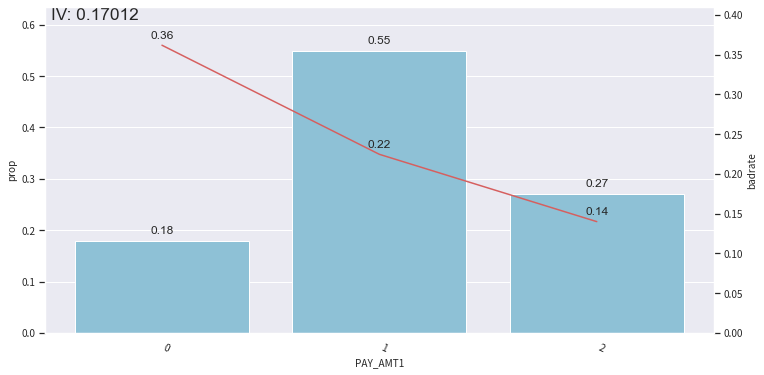

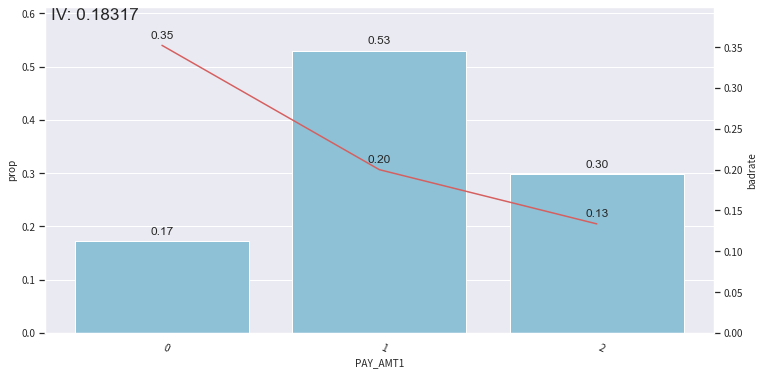

In [45]:
#double checking the propotion of the data binning with the train and test
#Fine tune bins
from toad.plot import  bin_plot,badrate_plot
bin_plot(train_bin,x='PAY_AMT1',target='label')
bin_plot(test_bin,x='PAY_AMT1',target='label')

###In this plot, the bar plot represents the proportion of the data in the corresponding bin; the red line represents the proportion of default customers.

We need to make sure that the binning has monotonicity, which means the line is trending in the same direction with no sudden jump or drop.

This plot looks ok, if there is a sudden jump or drop, we need to use c.set_rules(dict) to combine the binning.

###4. Transform to WOE and Calculate PSI
WOE transformation is performed after the binning is Done.

The steps are as follows:

Use the above-adjusted Combiner c to transform the data
Initialize woe transform t: t= toad.transform.WOETransformer()
Training the t: t.fit_transform trains and outputs woe transformed data for the trainset
target: target column data (not column name)
exclude: columns that do not need to be transformed by WOE. Note: All columns will be transformed, including the columns that have not been binning, and the columns that do not need to be converted by WOE will be deleted through exclude, especially the target column.
Transform the test/OOT data: transer.transform

In [46]:
##transform to WOE
t=toad.transform.WOETransformer()
#transform training set
train_woe = t.fit_transform(X=train_bin,
                            y=train_bin['label'], 
                            exclude=exclude_list)
#transform testing set
test_woe = t.transform(test_bin)

#for saving the csv purpose we are concating 
final_data_woe = pd.concat([train_woe,test_woe])

In [139]:
#save 2: pickle woe_transform
filename = 'CreditScore_save2_woe_transform.pkl'
pickle.dump(t, open(filename, 'wb'))

In [140]:
filename

'CreditScore_save2_woe_transform.pkl'

In [47]:
train_woe.head()


,ID,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,label
0,1,0.666522,0.088429,0.260065,2.019269,1.459809,-0.311239,-0.253727,-0.232378,-0.215037,...,0.028510,-0.006521,-0.034304,0.662394,0.124160,0.488183,0.454327,0.370272,0.343887,1
1,2,-0.034630,0.088429,-0.100163,-0.575364,1.459809,-0.311239,-0.253727,-0.232378,1.282840,...,-0.009858,-0.239312,-0.034304,0.662394,0.124160,0.016060,0.056501,0.370272,-0.082401,1
2,3,0.108342,0.088429,-0.028816,-0.575364,-0.378340,-0.311239,-0.253727,-0.232378,-0.215037,...,-0.009858,0.140562,-0.034304,-0.009085,0.124160,0.016060,0.056501,0.084926,-0.391360,0
3,4,0.200392,0.088429,-0.028816,-0.575364,-0.378340,-0.311239,-0.253727,-0.232378,-0.215037,...,-0.009858,0.140562,0.162615,-0.009085,-0.076846,0.016060,0.056501,0.084926,-0.119586,0
4,5,0.200392,0.088429,0.156679,-0.575364,-0.378340,-0.311239,-0.253727,-0.232378,-0.215037,...,-0.009858,0.140562,-0.034304,-0.009085,-1.078550,-0.372758,-0.457199,0.084926,0.257636,0


In [48]:
train_woe.shape

(22499, 23)

In [49]:
test_woe.shape

(7501, 23)

In [50]:
final_data_woe.shape

(30000, 23)

In [51]:
#letz calculate the feature_use based on the WOE 
features_use = [feat for feat in final_data_woe.columns if feat not in exclude_list]
len(features_use)

21

####Calculate PSI PSI (Population Stability Index) reflects the stability of the distribution. We often use it to screen features and evaluate model stability. The industry level is to drop features with a PSI greater than 0.2


In [52]:
#get the feature name
features_list = [feat for feat in train_woe.columns if feat not in exclude_list]

In [53]:
#calculate PSI using toad
psi_df = toad.metrics.PSI(train_woe[features_list], test_woe[features_list]).sort_values(0)


C:\Users\Viji\AppData\Local\Temp\ipykernel_9300\1901487294.py:2: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  psi_df = toad.metrics.PSI(train_woe[features_list], test_woe[features_list]).sort_values(0)


In [54]:
#put into a dataframe
psi_df = psi_df.reset_index()
psi_df = psi_df.rename(columns = {'index' : 'feature',0:'psi'})
psi_df

,feature,psi
0,PAY_4,0.000144
1,EDUCATION,0.000264
2,BILL_AMT4,0.000330
3,BILL_AMT6,0.001591
4,BILL_AMT5,0.002520
5,BILL_AMT1,0.002634
6,PAY_AMT5,0.003066
7,PAY_2,0.003356
8,PAY_AMT1,0.003402
9,PAY_3,0.003669


In [55]:
# features less than 0.25
psi_lesser = list(psi_df[psi_df.psi<0.25].feature)
# features geater than 0.25
psi_greater = list(psi_df[psi_df.psi>=0.25].feature)

In [56]:
psi_greater

[]

In [57]:
# keep exclude list
for i in exclude_list:
    if i in psi_lesser:
        pass
    else:
       psi_lesser.append(i) 

In [58]:
# keep the feature that are lesser than 0.25 in both test and train
train_woe_psi = train_woe[psi_lesser]
test_woe_psi = test_woe[psi_lesser]

In [59]:
# output our final data table
final_woe_psi = pd.concat([train_woe_psi,test_woe_psi])
final_woe_psi.shape

(30000, 23)

In [146]:
#save 3: final data table with transformed woe along with PSI
final_woe_psi.to_csv('CreditScore_save3_final_woe_PSI.csv')

###Output IV on WOE data
I think we can remove these parts


In [61]:
features_use = [feat for feat in final_woe_psi.columns if feat not in exclude_list]
len(features_use)

21

In [62]:
df_woe_iv=output_iv_importance(final_woe_psi[features_use+['label']],'label')
df_woe_iv

,name,iv
0,PAY_0,0.860976
1,PAY_2,0.544104
2,PAY_3,0.408793
3,PAY_4,0.354314
4,PAY_5,0.328299
5,PAY_6,0.281568
6,LIMIT_BAL,0.181621
7,PAY_AMT1,0.173425
8,PAY_AMT2,0.162703
9,PAY_AMT3,0.114630


In [147]:
#save 4: information value after woe transformation
df_woe_iv.to_csv('CreditScore_save4_IV.csv')

###The idea is to get the features with the highest IV and lowest PSI.

###model tunning:

In [188]:
x_train = train_woe[features_use]
y_train=train_woe['label']
x_test =test_woe[features_use] 
y_test = test_woe['label']
# final_data_woe.shape
x = final_data_woe.drop(columns=['label','ID'])
y = final_data_woe['label']


In [64]:
x_train.shape


(22499, 21)

In [65]:
y_train.shape

(22499,)

In [66]:
x_test.shape

(7501, 21)

In [67]:
y_test.shape

(7501,)

In [179]:
scores_accuracy=[]

Training set score: 0.813
Test set score: 0.835
Cross-validation scores:  [0.8        0.80955556 0.808      0.82311111 0.8261836 ]
Mean CV score: 0.813
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      5953
           1       0.72      0.33      0.45      1548

    accuracy                           0.83      7501
   macro avg       0.78      0.65      0.68      7501
weighted avg       0.82      0.83      0.81      7501

Confusion matrix:
[[5748  205]
 [1033  515]]


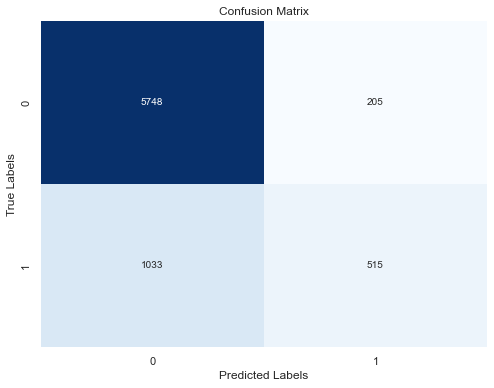

Mean Absolute Error: 0.16504466071190507
Mean Squared Error: 0.16504466071190507
Root Mean Squared Error: 0.40625689004853205


In [181]:
#Logestic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42).fit(x_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(x_test, y_test)))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(logreg, x_train, y_train, cv=5)
# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean CV score: {:.3f}".format(cv_scores.mean()))

#Classification Report:
# Predict on the test set
y_pred = logreg.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Evaluating the model:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 


Accuracy on training set: 0.963
Accuracy on test set: 0.747
Cross-validation scores:  [0.71933333 0.74222222 0.71533333 0.73066667 0.74327628]
Mean CV score: 0.730
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      5953
           1       0.38      0.37      0.38      1548

    accuracy                           0.75      7501
   macro avg       0.61      0.61      0.61      7501
weighted avg       0.74      0.75      0.75      7501

Confusion matrix:
[[5024  929]
 [ 971  577]]


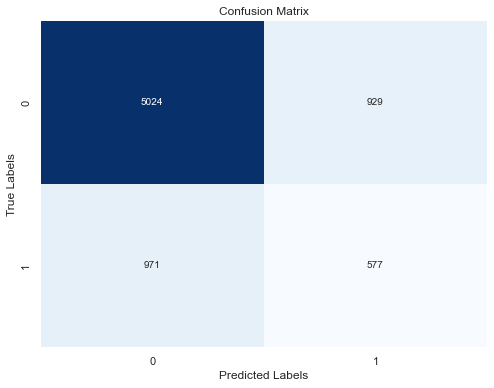

Mean Absolute Error: 0.25329956005865883
Mean Squared Error: 0.25329956005865883
Root Mean Squared Error: 0.5032887442201135


In [182]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(random_state=42)
tree1.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(x_test, y_test)))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(tree1, x_train, y_train, cv=5)
# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean CV score: {:.3f}".format(cv_scores.mean()))

#Classification Report:
# Predict on the test set
y_pred = tree1.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Evaluating the model:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Accuracy on training set: 0.963
Accuracy on test set: 0.813
Cross-validation scores:  [0.78577778 0.80222222 0.792      0.80444444 0.81418093]
Mean CV score: 0.800
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      5953
           1       0.58      0.35      0.44      1548

    accuracy                           0.81      7501
   macro avg       0.71      0.64      0.66      7501
weighted avg       0.79      0.81      0.79      7501

Confusion matrix:
[[5554  399]
 [1005  543]]


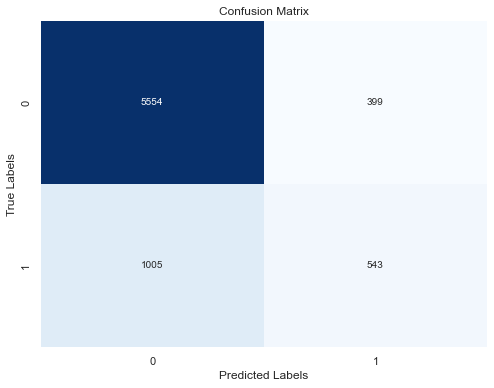

Mean Absolute Error: 0.18717504332755633
Mean Squared Error: 0.18717504332755633
Root Mean Squared Error: 0.43263731152959556


In [186]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(rf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(x_test, y_test)))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf, x_train, y_train, cv=5)
# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean CV score: {:.3f}".format(cv_scores.mean()))

#Classification Report:
# Predict on the test set
y_pred = rf.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Evaluating the model:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 


In [189]:
prediction_of_probability = rf.predict_proba(x)

C:\Users\Viji\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


Accuracy on training set: 0.821
Accuracy on test set: 0.836
Cross-validation scores:  [0.80111111 0.81444444 0.80711111 0.82866667 0.83129584]
Mean CV score: 0.817
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      5953
           1       0.71      0.35      0.47      1548

    accuracy                           0.84      7501
   macro avg       0.78      0.65      0.68      7501
weighted avg       0.82      0.84      0.81      7501

Confusion matrix:
[[5731  222]
 [1011  537]]


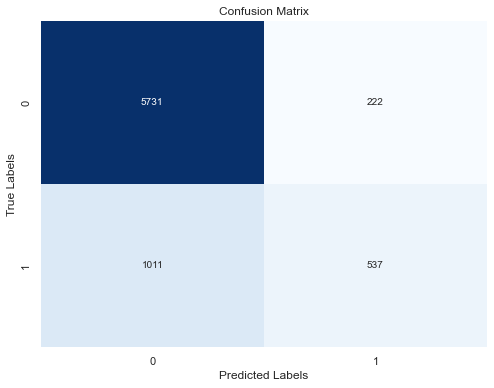

Mean Absolute Error: 0.16437808292227704
Mean Squared Error: 0.16437808292227704
Root Mean Squared Error: 0.40543567051047325


In [190]:
###GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(gb.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(x_test, y_test)))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(gb, x_train, y_train, cv=5)
# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean CV score: {:.3f}".format(cv_scores.mean()))

#Classification Report:
# Predict on the test set
y_pred = gb.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Evaluating the model:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Accuracy on training set: 0.814
Accuracy on test set: 0.833
Cross-validation scores:  [0.79911111 0.80955556 0.80733333 0.82533333 0.82484997]
Mean CV score: 0.813
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      5953
           1       0.72      0.31      0.44      1548

    accuracy                           0.83      7501
   macro avg       0.78      0.64      0.67      7501
weighted avg       0.82      0.83      0.81      7501

Confusion matrix:
[[5760  193]
 [1061  487]]


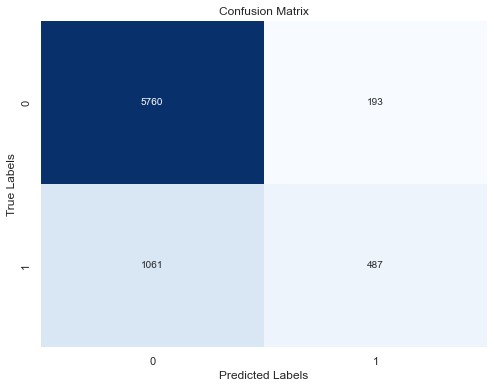

Mean Absolute Error: 0.16717770963871484
Mean Squared Error: 0.16717770963871484
Root Mean Squared Error: 0.4088737086665207


In [191]:
#This is good, but let’s see if we can get better results by limiting the maximum depth:
gb1 = GradientBoostingClassifier(max_depth=1, random_state=42)
gb1.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(gb1.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb1.score(x_test, y_test)))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(gb1, x_train, y_train, cv=5)
# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean CV score: {:.3f}".format(cv_scores.mean()))

#Classification Report:
# Predict on the test set
y_pred = gb1.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Evaluating the model:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Accuracy on training set: 0.800
Accuracy on test set: 0.817
Cross-validation scores:  [0.80111111 0.81244444 0.80688889 0.81044444 0.80462325]
Mean CV score: 0.807
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      5953
           1       0.80      0.15      0.26      1548

    accuracy                           0.82      7501
   macro avg       0.81      0.57      0.58      7501
weighted avg       0.81      0.82      0.76      7501

Confusion matrix:
[[5893   60]
 [1312  236]]


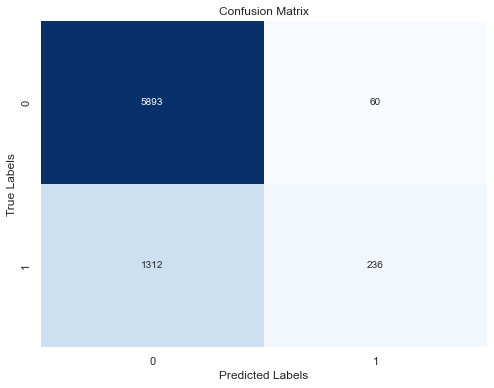

Mean Absolute Error: 0.1829089454739368
Mean Squared Error: 0.1829089454739368
Root Mean Squared Error: 0.42767855390928455


In [192]:
# Now, let’s see if we can get better results by lower the learning rate:
gb2 = GradientBoostingClassifier(learning_rate=0.01,random_state=42)
gb2.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(gb2.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb2.score(x_test, y_test)))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(gb2, x_train, y_train, cv=5)
# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean CV score: {:.3f}".format(cv_scores.mean()))

#Classification Report:
# Predict on the test set
y_pred = gb2.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Evaluating the model:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Accuracy on training set: 0.82
Accuracy on test set: 0.84
Cross-validation scores:  [0.80311111 0.81111111 0.80666667 0.82755556 0.8308513 ]
Mean CV score: 0.816
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      5953
           1       0.70      0.35      0.47      1548

    accuracy                           0.84      7501
   macro avg       0.78      0.66      0.69      7501
weighted avg       0.82      0.84      0.81      7501

Confusion matrix:
[[5724  229]
 [1006  542]]


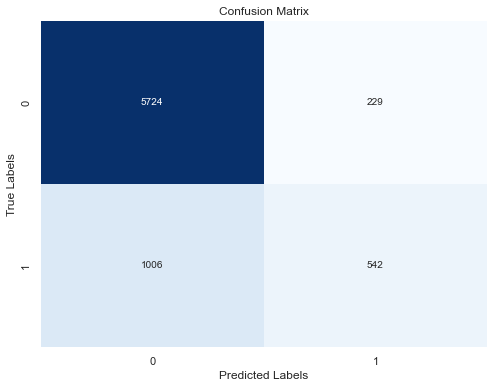

Mean Absolute Error: 0.16464471403812825
Mean Squared Error: 0.16464471403812825
Root Mean Squared Error: 0.4057643577720057


In [193]:
#Support Vector Machine(SVC)
from sklearn.svm import SVC
svc1 = SVC(random_state=42)
svc1.fit(x_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc1.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc1.score(x_test, y_test)))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(svc1, x_train, y_train, cv=5)
# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean CV score: {:.3f}".format(cv_scores.mean()))

#Classification Report:
# Predict on the test set
y_pred = svc1.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Evaluating the model:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

#The model doesn’t overfits but it has a poor score on the training set and only 59% accuracy on the test set.

SVM requires all the features to vary on a similar scale. We will need to re-scale our data that all the features are approximately on the same scale:

Accuracy on training set: 0.82
Accuracy on test set: 0.84
Cross-validation scores:  [0.80311111 0.81111111 0.80666667 0.82755556 0.8308513 ]
Mean CV score: 0.816


C:\Users\Viji\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      5953
           1       0.72      0.31      0.43      1548

    accuracy                           0.83      7501
   macro avg       0.78      0.64      0.67      7501
weighted avg       0.82      0.83      0.81      7501

Confusion matrix:
[[5768  185]
 [1069  479]]


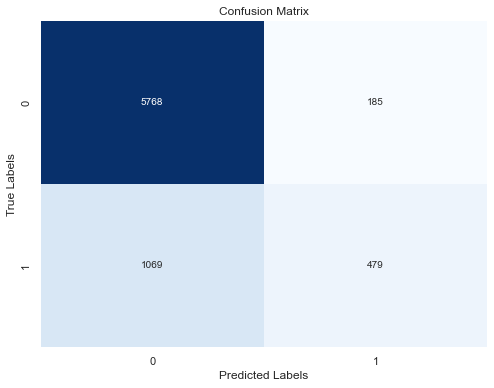

Mean Absolute Error: 0.16717770963871484
Mean Squared Error: 0.16717770963871484
Root Mean Squared Error: 0.4088737086665207


In [195]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)
svc2 = SVC(random_state=42)
svc2.fit(x_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(svc2.score(x_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc2.score(x_test_scaled, y_test)))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(svc2, x_train, y_train, cv=5)
# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean CV score: {:.3f}".format(cv_scores.mean()))

#Classification Report:
# Predict on the test set
y_pred = svc2.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Evaluating the model:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Accuracy of K-NN classifier on training set: 0.86
Accuracy of K-NN classifier on test set: 0.80
Cross-validation scores:  [0.774      0.776      0.77244444 0.78266667 0.78617471]
Mean CV score: 0.778
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      5953
           1       0.52      0.38      0.44      1548

    accuracy                           0.80      7501
   macro avg       0.69      0.64      0.66      7501
weighted avg       0.78      0.80      0.79      7501

Confusion matrix:
[[5422  531]
 [ 965  583]]


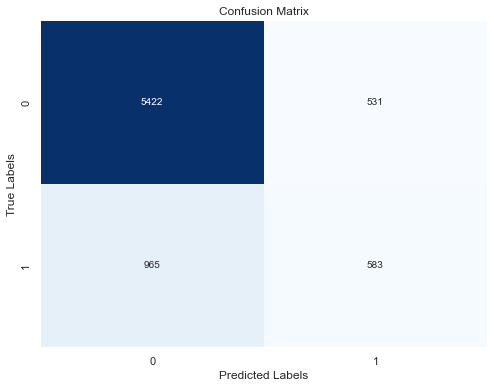

Mean Absolute Error: 0.19944007465671243
Mean Squared Error: 0.19944007465671243
Root Mean Squared Error: 0.4465871411681179


In [196]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(x_test, y_test)))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(knn, x_train, y_train, cv=5)
# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean CV score: {:.3f}".format(cv_scores.mean()))

#Classification Report:
# Predict on the test set
y_pred = knn.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Evaluating the model:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

In [ ]:
# transferring knowledge from the random forest probability:

In [ ]:
# x = final_data_woe.drop(columns=['label'])
# final_data_woe.shape

### Deep Learning:

C:\Users\Viji\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on training set: 0.83
Accuracy on test set: 0.83


C:\Users\Viji\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Viji\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Viji\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Viji\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Viji\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

Cross-validation scores:  [0.80044444 0.80822222 0.80333333 0.81755556 0.8261836 ]
Mean CV score: 0.811
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      5953
           1       0.70      0.34      0.46      1548

    accuracy                           0.83      7501
   macro avg       0.77      0.65      0.68      7501
weighted avg       0.82      0.83      0.81      7501

Confusion matrix:
[[5724  229]
 [1019  529]]


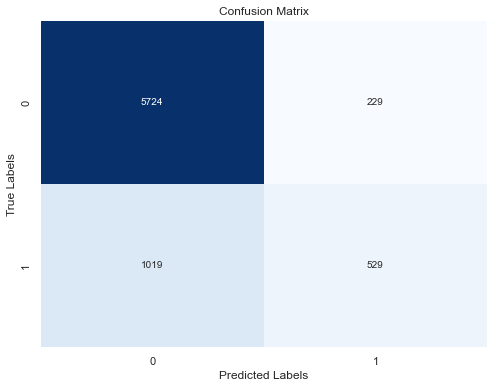

Mean Absolute Error: 0.1663778162911612
Mean Squared Error: 0.1663778162911612
Root Mean Squared Error: 0.4078943690358586


In [197]:
#Multilayer perceptrons (MLP) 

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(x_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(x_test, y_test)))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(mlp, x_train, y_train, cv=5)
# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean CV score: {:.3f}".format(cv_scores.mean()))

#Classification Report:
# Predict on the test set
y_pred = mlp.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Evaluating the model:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

#The accuracy of the Multilayer perceptrons (MLP) is worse than those of the other models. This is likely due to scaling of the data. Deep learning algorithms expect all input features to vary in a similar way, and ideally to have a mean of 0, and a variance of 1. We must re-scale our data so that it fulfills these requirements.

C:\Users\Viji\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on training set: 0.837
Accuracy on test set: 0.828


C:\Users\Viji\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Viji\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Viji\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Viji\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-validation scores:  [0.80044444 0.80822222 0.80333333 0.81755556 0.8261836 ]
Mean CV score: 0.811
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      5953
           1       0.64      0.34      0.44      1548

    accuracy                           0.82      7501
   macro avg       0.74      0.64      0.67      7501
weighted avg       0.80      0.82      0.80      7501

Confusion matrix:
[[5659  294]
 [1027  521]]


C:\Users\Viji\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Viji\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


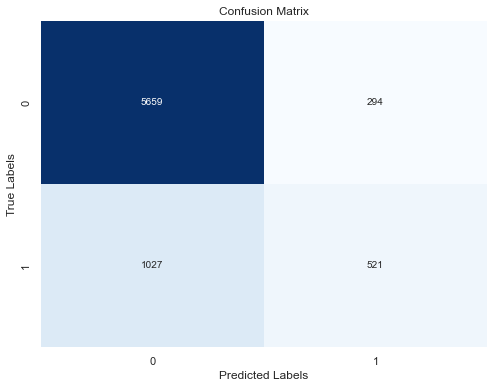

Mean Absolute Error: 0.1761098520197307
Mean Squared Error: 0.1761098520197307
Root Mean Squared Error: 0.41965444358392145


In [198]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)
mlp1 = MLPClassifier(random_state=42)
mlp1.fit(x_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(mlp1.score(x_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp1.score(x_test_scaled, y_test)))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(mlp1, x_train, y_train, cv=5)
# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean CV score: {:.3f}".format(cv_scores.mean()))

#Classification Report:
# Predict on the test set
y_pred = mlp1.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Evaluating the model:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Accuracy on training set: 0.842
Accuracy on test set: 0.824
Cross-validation scores:  [0.79488889 0.80555556 0.79844444 0.81444444 0.82329407]
Mean CV score: 0.807
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      5953
           1       0.53      0.40      0.45      1548

    accuracy                           0.80      7501
   macro avg       0.69      0.65      0.67      7501
weighted avg       0.79      0.80      0.79      7501

Confusion matrix:
[[5395  558]
 [ 928  620]]


C:\Users\Viji\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


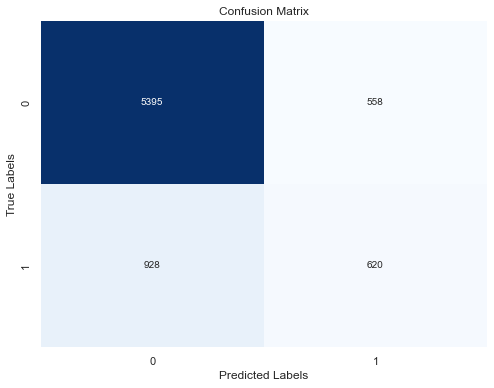

Mean Absolute Error: 0.19810691907745634
Mean Squared Error: 0.19810691907745634
Root Mean Squared Error: 0.44509203439003076


In [199]:
#Let’s increase the number of iterations:

mlp2 = MLPClassifier(max_iter=1000, random_state=42)
mlp2.fit(x_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(mlp2.score(x_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp2.score(x_test_scaled, y_test)))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(mlp2, x_train, y_train, cv=5)
# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean CV score: {:.3f}".format(cv_scores.mean()))

#Classification Report:
# Predict on the test set
y_pred = mlp2.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Evaluating the model:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

#Increasing the number of iterations didn’t change anything.

#Let’s increase the alpha parameter and add stronger regularization of the weights:

Accuracy on training set: 0.816
Accuracy on test set: 0.837
Cross-validation scores:  [0.80111111 0.80911111 0.80777778 0.82533333 0.82729495]
Mean CV score: 0.814
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      5953
           1       0.75      0.25      0.38      1548

    accuracy                           0.83      7501
   macro avg       0.79      0.61      0.64      7501
weighted avg       0.82      0.83      0.79      7501

Confusion matrix:
[[5822  131]
 [1160  388]]


C:\Users\Viji\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


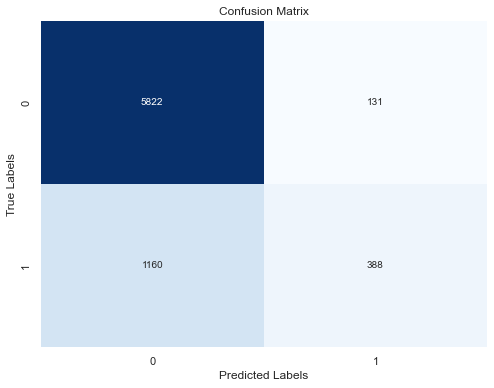

Mean Absolute Error: 0.1721103852819624
Mean Squared Error: 0.1721103852819624
Root Mean Squared Error: 0.41486188699609705


In [200]:
mlp3 = MLPClassifier(max_iter=1000, alpha=1, random_state=42)
mlp3.fit(x_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(mlp3.score(x_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp3.score(x_test_scaled, y_test)))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(mlp3, x_train, y_train, cv=5)
# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean CV score: {:.3f}".format(cv_scores.mean()))

#Classification Report:
# Predict on the test set
y_pred = mlp3.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Evaluating the model:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

#The result is good, but we reduced the test set accuracy a little bit.

#Therefore, our best model so far is default deep learning model after scaling.

In [90]:
#Comparing the algorithms performance

algorithms = ['k-Nearest Neighbors','Logistic Regression', 'Decision Trees', 'Random Forest',
 'GradiantBoosting','GradiantBoosting Max depth','GradiantBoosting Learning rate', 'Support Vector Machine','SVM minmaxscaler','DL-MLP',
              'DL-MLPScalar','DL_MLP_incr_Iteration','DL_MLP_alpha_parameter']
tests_accuracy = [knn.score(x_test, y_test), logreg.score(x_test, y_test), tree1.score(x_test, y_test),
 rf.score(x_test, y_test), gb.score(x_test, y_test),gb1.score(x_test, y_test),gb2.score(x_test, y_test),svc1.score(x_test, y_test),
svc2.score(x_test_scaled, y_test),mlp.score(x_test, y_test),mlp1.score(x_test_scaled, y_test),mlp2.score(x_test_scaled, 
y_test),mlp3.score(x_test_scaled, y_test),
]


compare_algorithms = pd.DataFrame({ "Algorithms": algorithms, "Tests Accuracy": tests_accuracy })
compare_algorithms.sort_values(by = "Tests Accuracy", ascending = False)

,Algorithms,Tests Accuracy
12,DL_MLP_alpha_parameter,0.836688
4,GaussianNB,0.835622
7,Support Vector Machine,0.835355
1,Logistic Regression,0.834955
9,DL-MLP,0.833622
5,GaussianNB Max depth,0.832822
10,DL-MLPScalar,0.828423
11,DL_MLP_incr_Iteration,0.824157
6,GaussianNB Low Length rate,0.817091
3,Random Forest,0.812825


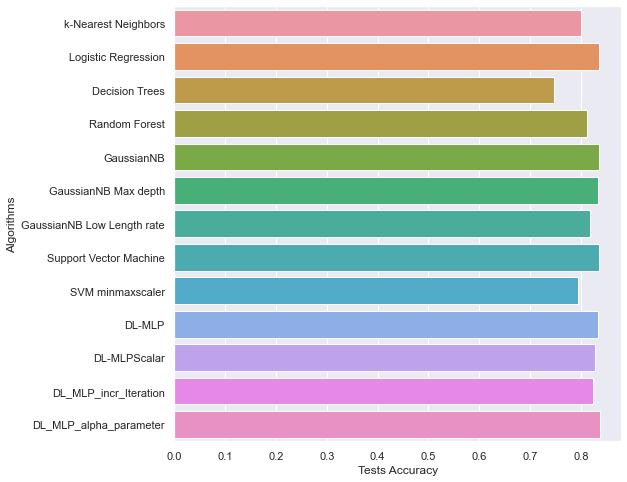

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))
sns.barplot(x = "Tests Accuracy", y = "Algorithms", data = compare_algorithms)
plt.show()

###Knowledge Distillation

In [92]:
bin_classes = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]


bins = [0.0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]


x['prob_0'] = pd.cut(prediction_of_probability[:,0],bins,labels=bin_classes, include_lowest=True)


x['prob_1'] = pd.cut(prediction_of_probability[:,1],bins,labels=bin_classes, include_lowest=True)
x1=x.drop(columns="prob_0",axis=1).head(30000)
x1.head


<bound method NDFrame.head of       LIMIT_BAL  EDUCATION       AGE     PAY_0     PAY_2     PAY_3     PAY_4  \
0      0.666522   0.088429  0.260065  2.019269  1.459809 -0.311239 -0.253727   
1     -0.034630   0.088429 -0.100163 -0.575364  1.459809 -0.311239 -0.253727   
2      0.108342   0.088429 -0.028816 -0.575364 -0.378340 -0.311239 -0.253727   
3      0.200392   0.088429 -0.028816 -0.575364 -0.378340 -0.311239 -0.253727   
4      0.200392   0.088429  0.156679 -0.575364 -0.378340 -0.311239 -0.253727   
...         ...        ...       ...       ...       ...       ...       ...   
7496  -0.280994   0.088429 -0.028816 -0.575364 -0.378340 -0.311239 -0.253727   
7497  -0.280994   0.088429 -0.028816 -0.575364 -0.378340 -0.311239 -0.253727   
7498   0.666522   0.088429 -0.028816  2.019269  1.459809  1.305413 -0.253727   
7499   0.108342   0.088429 -0.028816  0.583884 -0.378340 -0.311239 -0.253727   
7500   0.200392   0.088429  0.156679 -0.575364 -0.378340 -0.311239 -0.253727   

         

###After Knowledge Distillation:

In [93]:
# after transferred the knowledge from
KY=final_data_woe['label']
KX=x1

In [94]:
KX.shape

(30000, 22)

In [95]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 = train_test_split(KX,KY,test_size=0.25,random_state=0)

In [201]:

#Logestic Regression
from sklearn.linear_model import LogisticRegression
klogreg = LogisticRegression(random_state=42).fit(x_train1, y_train1)
print("Training set score: {:.3f}".format(klogreg.score(x_train1, y_train1)))
print("Test set score: {:.3f}".format(klogreg.score(x_test1, y_test1)))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(klogreg, x_train, y_train, cv=5)
# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean CV score: {:.3f}".format(cv_scores.mean()))

#Classification Report:
# Predict on the test set
y_pred = klogreg.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Evaluating the model:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Training set score: 0.818
Test set score: 0.820
Cross-validation scores:  [0.8        0.80955556 0.808      0.82311111 0.8261836 ]
Mean CV score: 0.813


C:\Users\Viji\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- prob_1

  warnings.warn(message, FutureWarning)


ValueError: X has 21 features, but LogisticRegression is expecting 22 features as input.

In [ ]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
ktree = DecisionTreeClassifier(random_state=42)
ktree.fit(x_train1, y_train1)
print("Accuracy on training set: {:.3f}".format(ktree.score(x_train1, y_train1)))
print("Accuracy on test set: {:.3f}".format(ktree.score(x_test1, y_test1)))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(ktree, x_train, y_train, cv=5)
# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean CV score: {:.3f}".format(cv_scores.mean()))

#Classification Report:
# Predict on the test set
y_pred = ktree.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Evaluating the model:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

In [ ]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
krf = RandomForestClassifier(n_estimators=100, random_state=42)
krf.fit(x_train1, y_train1)
# prediction_of_probability = rf.predict_proba(x)
print("Accuracy on training set: {:.3f}".format(krf.score(x_train1, y_train1)))
print("Accuracy on test set: {:.3f}".format(krf.score(x_test1, y_test1)))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(krf, x_train, y_train, cv=5)
# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean CV score: {:.3f}".format(cv_scores.mean()))

#Classification Report:
# Predict on the test set
y_pred = krf.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Evaluating the model:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

In [ ]:
###GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
kgb = GradientBoostingClassifier(random_state=42)
kgb.fit(x_train1, y_train1)
print("Accuracy on training set: {:.3f}".format(kgb.score(x_train1, y_train1)))
print("Accuracy on test set: {:.3f}".format(kgb.score(x_test1, y_test1)))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(kgb, x_train, y_train, cv=5)
# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean CV score: {:.3f}".format(cv_scores.mean()))

#Classification Report:
# Predict on the test set
y_pred = kgb.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Evaluating the model:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

In [ ]:
#This is good, but let’s see if we can get better results by limiting the maximum depth:
kgb1 = GradientBoostingClassifier(max_depth=1, random_state=42)
kgb1.fit(x_train1, y_train1)
print("Accuracy on training set: {:.3f}".format(kgb1.score(x_train1, y_train1)))
print("Accuracy on test set: {:.3f}".format(kgb1.score(x_test1, y_test1)))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(kgb1, x_train, y_train, cv=5)
# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean CV score: {:.3f}".format(cv_scores.mean()))

#Classification Report:
# Predict on the test set
y_pred = kgb1.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Evaluating the model:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

In [ ]:
# Now, let’s see if we can get better results by lower the learning rate:
kgb2 = GradientBoostingClassifier(learning_rate=0.01,random_state=42)
kgb2.fit(x_train1, y_train1)
print("Accuracy on training set: {:.3f}".format(kgb2.score(x_train1, y_train1)))
print("Accuracy on test set: {:.3f}".format(kgb2.score(x_test1, y_test1))) 

# Perform 5-fold cross-validation
cv_scores = cross_val_score(kgb2, x_train, y_train, cv=5)
# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean CV score: {:.3f}".format(cv_scores.mean()))

#Classification Report:
# Predict on the test set
y_pred = kgb2.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Evaluating the model:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

In [ ]:
#Support Vector Machine(SVC)
from sklearn.svm import SVC
ksvc = SVC(random_state=42)
ksvc.fit(x_train1, y_train1)
print("Accuracy on training set: {:.2f}".format(ksvc.score(x_train1, y_train1)))
print("Accuracy on test set: {:.2f}".format(ksvc.score(x_test1, y_test1)))


# Perform 5-fold cross-validation
cv_scores = cross_val_score(ksvc, x_train, y_train, cv=5)
# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean CV score: {:.3f}".format(cv_scores.mean()))

#Classification Report:
# Predict on the test set
y_pred = ksvc.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Evaluating the model:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
kx_train_scaled = scaler.fit_transform(x_train1)
kx_test_scaled = scaler.fit_transform(x_test1)
ksvc1 = SVC(random_state=42)
ksvc1.fit(kx_train_scaled, y_train1)
print("Accuracy on training set: {:.2f}".format(ksvc1.score(kx_train_scaled, y_train1)))
print("Accuracy on test set: {:.2f}".format(ksvc1.score(kx_test_scaled, y_test1)))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(ksvc1, x_train, y_train, cv=5)
# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean CV score: {:.3f}".format(cv_scores.mean()))

#Classification Report:
# Predict on the test set
y_pred = ksvc1.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Evaluating the model:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

kknn = KNeighborsClassifier(n_neighbors=3)
kknn.fit(x_train1, y_train1)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(kknn.score(x_train1, y_train1)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(kknn.score(x_test1, y_test1)))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(kknn, x_train, y_train, cv=5)
# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean CV score: {:.3f}".format(cv_scores.mean()))

#Classification Report:
# Predict on the test set
y_pred = kknn.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Evaluating the model:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
#Multilayer perceptrons (MLP) 

from sklearn.neural_network import MLPClassifier
kmlp1 = MLPClassifier(random_state=42)
kmlp1.fit(x_train1, y_train1)
print("Accuracy on training set: {:.2f}".format(kmlp1.score(x_train1, y_train1)))
print("Accuracy on test set: {:.2f}".format(kmlp1.score(x_test1, y_test1)))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(kmlp1, x_train, y_train, cv=5)
# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean CV score: {:.3f}".format(cv_scores.mean()))

#Classification Report:
# Predict on the test set
y_pred = kmlp1.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Evaluating the model:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1_train_scaled = scaler.fit_transform(x_train1)
x1_test_scaled = scaler.fit_transform(x_test1)
kmlp2 = MLPClassifier(random_state=42)
kmlp2.fit(x1_train_scaled, y_train1)
print("Accuracy on training set: {:.3f}".format(kmlp2.score(x1_train_scaled, y_train1)))
print("Accuracy on test set: {:.3f}".format(kmlp2.score(x1_test_scaled, y_test1)))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(kmlp2, x_train, y_train, cv=5)
# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean CV score: {:.3f}".format(cv_scores.mean()))

#Classification Report:
# Predict on the test set
y_pred = kmlp2.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Evaluating the model:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [118]:
#Let’s increase the number of iterations:

kmlp3 = MLPClassifier(max_iter=1000, random_state=42)
kmlp3.fit(x1_train_scaled, y_train1)
print("Accuracy on training set: {:.3f}".format(kmlp3.score(x1_train_scaled, y_train1)))
print("Accuracy on test set: {:.3f}".format(kmlp3.score(x1_test_scaled, y_test1)))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(kmlp3, x_train, y_train, cv=5)
# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean CV score: {:.3f}".format(cv_scores.mean()))

#Classification Report:
# Predict on the test set
y_pred = kmlp3.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Evaluating the model:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy on training set: 0.846
Accuracy on test set: 0.807


In [ ]:
kmlp4 = MLPClassifier(max_iter=1000, alpha=1, random_state=42)
kmlp4.fit(x1_train_scaled, y_train1)
print("Accuracy on training set: {:.3f}".format(kmlp4.score(x1_train_scaled, y_train1)))
print("Accuracy on test set: {:.3f}".format(kmlp4.score(x1_test_scaled, y_test1)))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(kmlp4, x_train, y_train, cv=5)
# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean CV score: {:.3f}".format(cv_scores.mean()))

#Classification Report:
# Predict on the test set
y_pred = kmlp4.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Evaluating the model:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [120]:
#Comparing the algorithms performance

algorithms = ['k-Nearest Neighbors','Logistic Regression', 'Decision Trees', 'Random Forest',
 'GaussianNB','GaussianNB Max depth','GaussianNB Low Length rate', 'Support Vector Machine','SVM minmaxscaler','DL-MLP',
              'DL-MLPScalar','DL_MLP_incr_Iteration','DL_MLP_alpha_parameter']
tests_accuracy = [kknn.score(x_test1, y_test1), klogreg.score(x_test1, y_test1), ktree.score(x_test1, y_test1),
 krf.score(x_test1, y_test1), kgb.score(x_test1, y_test1),kgb1.score(x_test1, y_test1),kgb2.score(x_test1, y_test1),ksvc.score(x_test1, y_test1),
ksvc1.score(kx_test_scaled, y_test1),kmlp1.score(x_test1, y_test1),kmlp2.score(x1_test_scaled, y_test1),kmlp3.score(x1_test_scaled, y_test1),
kmlp4.score(x1_test_scaled, y_test1)
]


compare_algorithms = pd.DataFrame({ "Algorithms": algorithms, "Tests Accuracy": tests_accuracy })
compare_algorithms.sort_values(by = "Tests Accuracy", ascending = False)

,Algorithms,Tests Accuracy
4,GaussianNB,0.827067
8,SVM minmaxscaler,0.826933
7,Support Vector Machine,0.825467
12,DL_MLP_alpha_parameter,0.824000
5,GaussianNB Max depth,0.821333
1,Logistic Regression,0.820400
9,DL-MLP,0.819600
10,DL-MLPScalar,0.812933
11,DL_MLP_incr_Iteration,0.807067
6,GaussianNB Low Length rate,0.805867


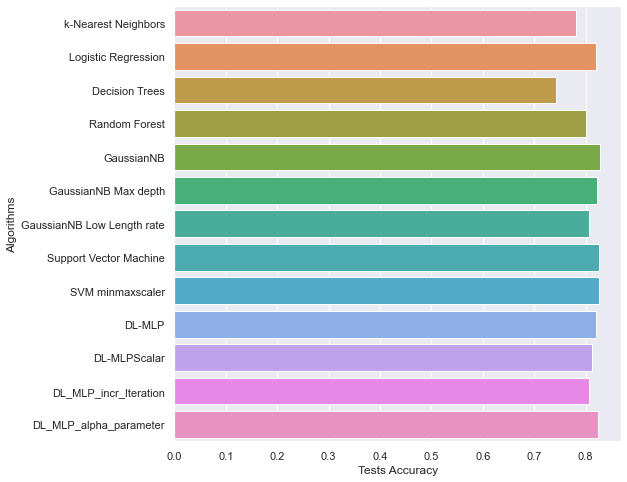

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))
sns.barplot(x = "Tests Accuracy", y = "Algorithms", data = compare_algorithms)
plt.show()

In [148]:
# As we expected KD suppose to work fine with algorithms, but here it is not, the comparisons shows maximum prediction accuracy is 
# GauusianNB and accuracy is 82.70.  So here to build credit score card we are going to use the algorithm DL_MLP_alpha_parameter 
# prediction accuracy is 83.67.

#Scorecard Tunning:
#base_score = 1000, base_odds = 35 , pdo = 80, rate = 2
#The actual meaning is that when the base odds are 35, the benchmark score is 1000, 
#and when the ratio is twice the benchmark, the benchmark score drops by 80 points.

# scorecard tuning
card = toad.ScoreCard(
    combiner = combiner,
    transer = t,
    class_weight = 'balanced',
    C=0.1,
    base_score = 1000,
    base_odds = 35 ,
    pdo = 80,
    rate = 2
)

In [149]:
card.fit(train_woe[features_use], train_woe['label'])


ScoreCard(base_score=1000,
          combiner=<toad.transform.Combiner object at 0x0000022D34047CA0>,
          pdo=80,
          transer=<toad.transform.WOETransformer object at 0x0000022D33EF1760>)

In [150]:
# save 5: save the model to disk
filename = 'CreditScore_save5_ScoreCard.pkl'
pickle.dump(card, open(filename, 'wb'))

In [151]:
#inference on test data
test['CreditScore'] = card.predict(test)
test['CreditScore'].describe()

count    7501.000000
mean      626.896946
std       112.420376
min       166.880486
25%       598.389363
50%       659.374155
75%       700.155949
max       804.407003
Name: CreditScore, dtype: float64

In [156]:
#inference on whole data
df['CreditScore'] = card.predict(df)
df['CreditScore'].describe()
# df.head()

count    30000.000000
mean       617.172826
std        117.602057
min        163.031919
25%        578.161670
50%        653.563403
75%        694.908149
max        812.041387
Name: CreditScore, dtype: float64

In [154]:
#output the scorecard
final_card_score=card.export()
len(final_card_score)
# x_train = train_woe[features_use]
# y_train=train_woe['label']

21

In [159]:
#transform the scorecard into dataframe and save to csv
# keys = list(card.export().keys())
# score_card_df = pd.DataFrame()
# for n in keys:
#     temp = pd.DataFrame.from_dict(final_card_score[n], orient='index')
#     temp = temp.reset_index()
#     temp.columns= ['binning','score']
#     temp['variable'] = n
#     temp = temp[['variable','binning','score']]
#     score_card_df=score_card_df.append(temp)
# score_card_df.head(30)

dfs_to_concat = []

for n in keys:
    temp = pd.DataFrame.from_dict(final_card_score[n], orient='index')
    temp = temp.reset_index()
    temp.columns = ['binning', 'score']
    temp['variable'] = n
    temp = temp[['variable', 'binning', 'score']]
    dfs_to_concat.append(temp)

score_card_df = pd.concat(dfs_to_concat, ignore_index=True)

score_card_df.head(30)

,variable,binning,score
0,PAY_4,[-inf ~ 1),31.95
1,PAY_4,[1 ~ inf),6.97
2,EDUCATION,[-inf ~ 2),28.49
3,EDUCATION,[2 ~ inf),27.82
4,BILL_AMT4,[-inf ~ 2501.0),27.99
5,BILL_AMT4,[2501.0 ~ inf),28.06
6,BILL_AMT6,[-inf ~ 19195.0),27.22
7,BILL_AMT6,[19195.0 ~ 50442.0),31.96
8,BILL_AMT6,[50442.0 ~ inf),25.93
9,BILL_AMT5,[-inf ~ 2395.0),28.15


In [160]:
#save 6: save the scorcard
score_card_df.to_csv('CreditScore_save6_score_card_df.csv',index=False)

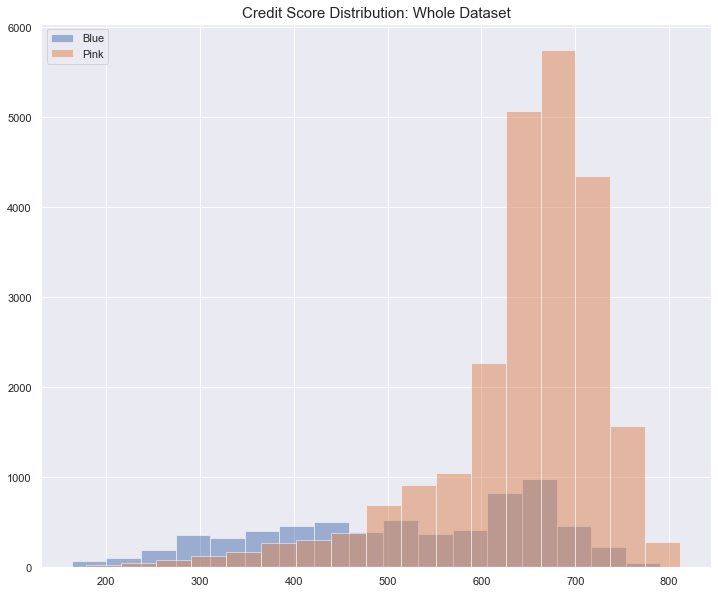

In [164]:
plt.figure(figsize=(12,10))
import random
import numpy
from matplotlib import pyplot as plt

w = 40
n = math.ceil((df['CreditScore'].max() - df['CreditScore'].min())/w)
#bins = numpy.linspace(-10, 10, 100)

plt.hist(df[df.label==1].CreditScore, alpha=0.5, label='Blue',bins = n)
plt.hist(df[df.label==0].CreditScore, alpha=0.5, label='Pink',bins = n)
plt.legend(loc='upper left')
plt.title('Credit Score Distribution: Whole Dataset',size=15)
plt.show()

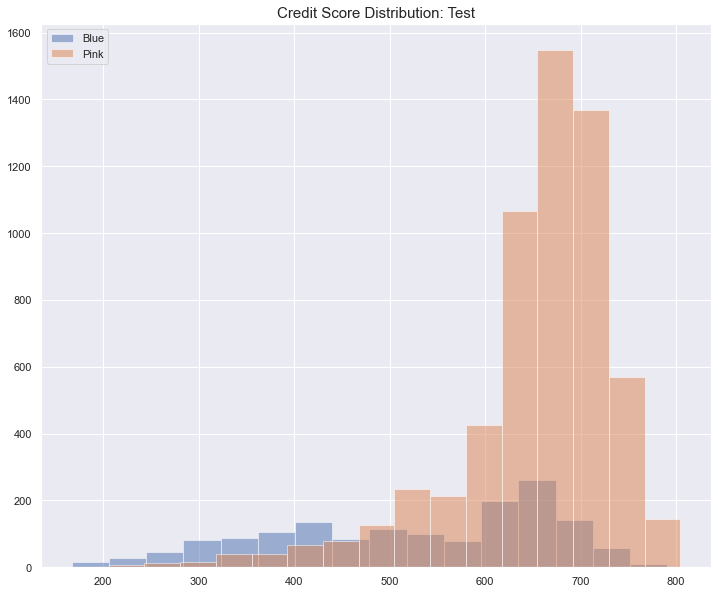

In [167]:
plt.figure(figsize=(12,10))
import random
import numpy
from matplotlib import pyplot as plt

w = 40
n = math.ceil((test['CreditScore'].max() - test['CreditScore'].min())/w)
#bins = numpy.linspace(-10, 10, 100)

plt.hist(test[test.label==1].CreditScore, alpha=0.5, label='Blue',bins = n)
plt.hist(test[test.label==0].CreditScore, alpha=0.5, label='Pink',bins = n)
plt.legend(loc='upper left')
plt.title('Credit Score Distribution: Test',size=15)
plt.show()

In [168]:
#save 7: save the scorcard
df.to_csv('OrderScore_save7_whole_data.csv',index=False)